In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 8, 5
COLORS = ['r', 'g', 'b', 'c', 'm', 'y', 'purple', 'lime', 'pink', 'yellow', 'orange', 'brown']

from scipy.stats import multivariate_normal

In [2]:
def plot(data, ax, title):

    for i in range(len(data)):
        ax.scatter(data[i][0], data[i][1], color=COLORS[i], alpha=0.5, label=f"Class {i}")
        ax.set_title(title)
    ax.legend()


def load_data(directory, num_classes, delimiter=','):
    data = []
    for i in range(1, num_classes + 1):
        d = pd.read_csv(f'{directory}/class{i}.txt', header=None, delimiter=delimiter)
        data.append(d)
        d['class'] = i - 1
    
    data.append(pd.concat(data).reset_index(drop=True))
    return tuple(data)

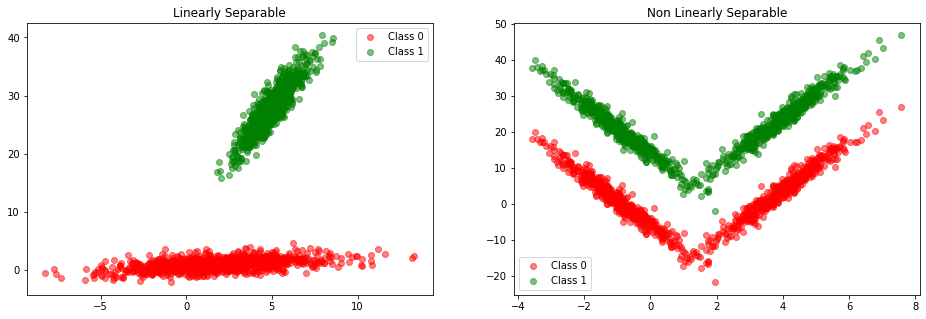

In [3]:
ls_c1, ls_c2, ls = load_data('ls_data', 2)
nls_c1, nls_c2, nls = load_data('nls_data', 2)

fig, ax = plt.subplots(1, 2, figsize=(16,5))
plot((ls_c1, ls_c2), ax[0], "Linearly Separable")
plot((nls_c1, nls_c2), ax[1], "Non Linearly Separable")

In [4]:
from sklearn.model_selection import train_test_split

def split_data(data):
    X = data.drop('class', axis = 1)
    y = data['class']
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
    x_train.reset_index(drop=True, inplace=True)
    x_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)

    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    
    
    return (x_train, x_test, y_train, y_test)

ls_x_train, ls_x_test, ls_y_train, ls_y_test = split_data(ls)
nls_x_train, nls_x_test, nls_y_train, nls_y_test = split_data(nls)

In [5]:
class Perceptron:

    def __init__(self, eta=0.01, n_iters=1000):
        self.eta = eta # Learning rate.
        self.n_iters = n_iters
        self.w = None
        self.b = None       
        self.n = None
        self.n_dims = None

    def fit(self, X, y):
        self.n, self.n_dims = X.shape

        self.w = np.zeros(self.n_dims)
        self.b = 0

        y_ = np.where(y>0, 1, 0)

        for _ in range(self.n_iters):
            for i in range(self.n):
                y_predicted = self.predict(X[i])

                update = self.eta * (y_[i] - y_predicted)
                self.w += update * X[i]
                self.b += update

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        predictions = np.where(z>=0, 1, 0)
        return predictions

In [6]:
def plot_boundary(X, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    
    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    ax.contourf(xx, yy, preds)

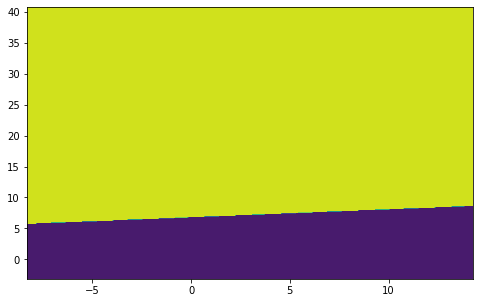

In [7]:
Per_ls = Perceptron()
Per_ls.fit(ls_x_train, ls_y_train)
plot_boundary(ls_x_train, Per_ls)

In [8]:
predicted_ls = Per_ls.predict(ls_x_test)
confusion_matrix(ls_y_test, predicted_ls)

array([[302,   0],
       [  0, 298]])

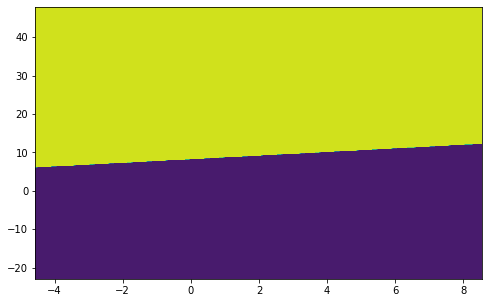

In [9]:
Per_nls = Perceptron()
Per_nls.fit(nls_x_train, nls_y_train)
plot_boundary(nls_x_train, Per_nls)

In [10]:
predicted_nls = Per_nls.predict(nls_x_test)
confusion_matrix(nls_y_test, predicted_nls)

array([[249,  53],
       [ 12, 286]])

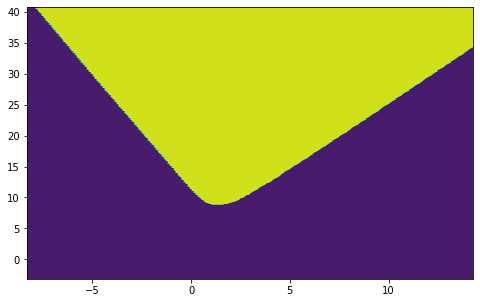

In [11]:
from sklearn.neural_network import MLPClassifier
MLP_ls = MLPClassifier()
MLP_ls.fit(ls_x_train, ls_y_train)
plot_boundary(ls_x_train, MLP_ls)

In [12]:
predicted_MLP_ls = MLP_ls.predict(ls_x_test)
confusion_matrix(ls_y_test, predicted_MLP_ls)

array([[302,   0],
       [  0, 298]])

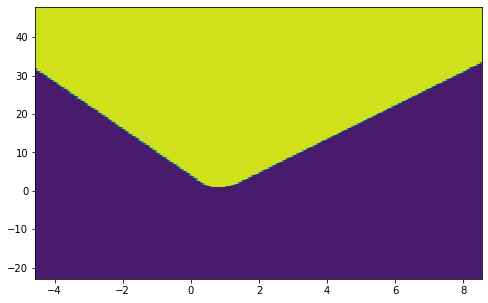

In [13]:
MLP_nls = MLPClassifier()
MLP_nls.fit(nls_x_train, nls_y_train)
plot_boundary(nls_x_train, MLP_nls)

In [14]:
predicted_MLP_nls = MLP_nls.predict(nls_x_test)
confusion_matrix(nls_y_test, predicted_MLP_nls)

array([[302,   0],
       [  2, 296]])

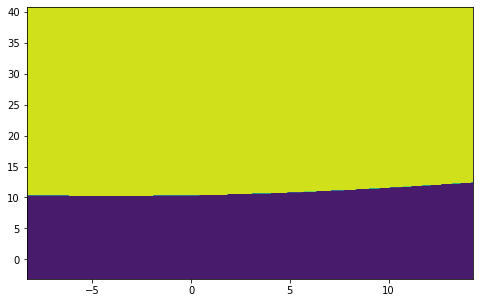

In [15]:
from sklearn.svm import SVC
SVC_ls = SVC()
SVC_ls.fit(ls_x_train, ls_y_train)
plot_boundary(ls_x_train, SVC_ls)

In [16]:
predicted_SVC_ls = SVC_ls.predict(ls_x_test)
confusion_matrix(ls_y_test, predicted_SVC_ls)

array([[302,   0],
       [  0, 298]])

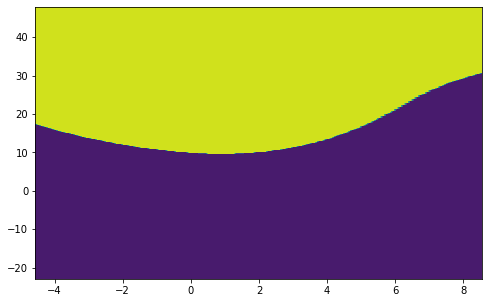

In [17]:
SVC_nls = SVC()
SVC_nls.fit(nls_x_train, nls_y_train)
plot_boundary(nls_x_train, SVC_nls)

In [18]:
predicted_SVC_nls = SVC_nls.predict(nls_x_test)
confusion_matrix(nls_y_test, predicted_SVC_nls)

array([[296,   6],
       [ 13, 285]])